<a href="https://colab.research.google.com/github/arshbm/Merck_pricing/blob/france_xg/Merck_France_XGv0_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Adding another cell to check

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder


In [ ]:
data = pd.read_excel('/content/Training Data v0.1.xlsx', sheet_name='Consolidated data', header = 4).iloc[0:, 1:58]

In [ ]:
# prompt: write a code to select only the user-defined columns in the data

# Filter for rows where market is either France, Italy, or Germany
data = data[data['Market'].isin(['France'])]

# Select specific columns
selected_columns = [
# 'Asset ',
'short Indication',
'EMA approved',
'First-in-class',
'Comparator arm',
'PFS HR',
'OS HR',
'Asset mPFS (months)',
'Asset mOS (months)',
'mPFS (months)',
'mOS (months)',
'Level of Unmet Need',
'Incidence per 100k (EPAR)',
'Orphan Drug Designation',
'Reimbursement Status'
] # Example columns, replace with your desired columns
data = data[selected_columns]

data = data[data['Reimbursement Status'] != 'Reimbursement decision pending']




In [ ]:
import pandas as pd
import numpy as np

# Define missing values (already in uppercase for comparison)
missing_values = {"N.R.", "NR", "N/A", "NA", "NOT REPORTED", "NE"}

# List of columns to clean
cols_to_clean = ['Asset mPFS (months)', 'Asset mOS (months)', 'mPFS (months)', 'mOS (months)']

for col in cols_to_clean:
    # Convert to uppercase, strip whitespace, then replace
    data[col] = data[col].astype(str).str.upper().str.strip()
    data[col] = data[col].replace(missing_values, np.nan)

    # Optionally, convert to float if numeric values are expected
    data[col] = pd.to_numeric(data[col], errors='coerce')
# ... (rest of your code)


In [ ]:
# prompt: Write a code that performs label encoding on certain columns specified by the user on the data dataframe


# Specify the columns you want to label encode
columns_to_encode = [
'Asset ',
'short Indication',
'Market',
'EMA approved',
'First-in-class',
'Comparator arm',
'Active comparator (branded or generic)',
'Active comparator type',
'Level of Unmet Need',
'Appropriate comparator therapy',
'Relative Population Size',
'Mono vs combination therapy',
'Orphan Drug Designation',
'Final Scope for Analysis',
'Reimbursement Status'
] # Replace with your actual column names


# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Iterate through the specified columns and apply label encoding
for column in columns_to_encode:
  if column in data.columns:
    data[column] = label_encoder.fit_transform(data[column])
  else:
    print(f"Warning: Column '{column}' not found in the DataFrame.")

data.head()


,short Indication,EMA approved,First-in-class,Comparator arm,PFS HR,OS HR,Asset mPFS (months),Asset mOS (months),mPFS (months),mOS (months),Level of Unmet Need,Incidence per 100k (EPAR),Orphan Drug Designation,Reimbursement Status
0,32,1,0,0,0.31,NaN,24.9,NaN,7.2,NaN,1,0.2907,1,1
1,30,1,0,2,NaN,NaN,9.0,NaN,NaN,NaN,0,0.0666,1,1
2,42,1,0,2,NaN,NaN,17.2,NaN,NaN,NaN,0,5.2500,0,1
3,32,1,0,0,0.36,NaN,24.9,NaN,7.2,NaN,1,0.2907,1,1
4,30,1,0,2,NaN,NaN,9.0,NaN,NaN,NaN,0,0.0666,1,1


In [ ]:
data.loc[data['Comparator arm'] == 'Single arm', :]

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder


In [ ]:
data.head()

In [ ]:
x = data.drop(columns=['Reimbursement Status'])
y = data['Reimbursement Status']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

for n in range(1,20):
    clf = DecisionTreeClassifier(random_state=42, max_depth = n, min_samples_split=10, min_impurity_decrease=0.011)  # You can add hyperparameters here (e.g., max_depth, min_samples_split)
    clf.fit(x_train, y_train)
    y_pred_train = clf.predict(x_train)
    y_pred_test = clf.predict(x_test)
    train_accuracy = accuracy_score(y_train, y_pred_train)
    test_accuracy = accuracy_score(y_test, y_pred_test)
    y_pred_overall = clf.predict(x)
    overall_accuracy = accuracy_score(y, y_pred_overall)
    print(f"Tree Depth: {n}; Training Accuracy: {train_accuracy * 100:.2f}%; Testing Accuracy: {test_accuracy* 100:.2f}%; \
Overall Accuracy: {overall_accuracy*100:.2f}% ")



In [ ]:
x = data.drop(columns=['Reimbursement Status'])
y = data['Reimbursement Status']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

for n in range(1,20):
    clf = DecisionTreeClassifier(random_state=42, max_depth = n, min_samples_split=10, min_impurity_decrease=0.012)  # You can add hyperparameters here (e.g., max_depth, min_samples_split)
    clf.fit(x_train, y_train)
    y_pred_train = clf.predict(x_train)
    y_pred_test = clf.predict(x_test)
    train_accuracy = accuracy_score(y_train, y_pred_train)
    test_accuracy = accuracy_score(y_test, y_pred_test)
    y_pred_overall = clf.predict(x)
    overall_accuracy = accuracy_score(y, y_pred_overall)
    print(f"Tree Depth: {n}; Training Accuracy: {train_accuracy * 100:.2f}%; Testing Accuracy: {test_accuracy* 100:.2f}%; \
Overall Accuracy: {overall_accuracy*100:.2f}% ")



Tree Depth: 1; Training Accuracy: 74.14%; Testing Accuracy: 73.33%; Overall Accuracy: 73.97% 
Tree Depth: 2; Training Accuracy: 80.17%; Testing Accuracy: 76.67%; Overall Accuracy: 79.45% 
Tree Depth: 3; Training Accuracy: 83.62%; Testing Accuracy: 56.67%; Overall Accuracy: 78.08% 
Tree Depth: 4; Training Accuracy: 86.21%; Testing Accuracy: 80.00%; Overall Accuracy: 84.93% 
Tree Depth: 5; Training Accuracy: 88.79%; Testing Accuracy: 70.00%; Overall Accuracy: 84.93% 
Tree Depth: 6; Training Accuracy: 92.24%; Testing Accuracy: 83.33%; Overall Accuracy: 90.41% 
Tree Depth: 7; Training Accuracy: 92.24%; Testing Accuracy: 83.33%; Overall Accuracy: 90.41% 
Tree Depth: 8; Training Accuracy: 92.24%; Testing Accuracy: 83.33%; Overall Accuracy: 90.41% 
Tree Depth: 9; Training Accuracy: 92.24%; Testing Accuracy: 83.33%; Overall Accuracy: 90.41% 
Tree Depth: 10; Training Accuracy: 92.24%; Testing Accuracy: 83.33%; Overall Accuracy: 90.41% 
Tree Depth: 11; Training Accuracy: 92.24%; Testing Accuracy

In [ ]:
for i in range(1,10):
  clf = DecisionTreeClassifier(random_state=42, max_depth = i, min_samples_split=7)
  scores = cross_val_score(clf, x, y, cv=5)  # 5-fold cross-validation

  print("Accuracy scores for each fold:", scores)
  print("Average accuracy:", scores.mean())


Accuracy scores for each fold: [0.73333333 0.75862069 0.75862069 0.72413793 0.72413793]
Average accuracy: 0.7397701149425286
Accuracy scores for each fold: [0.7        0.75862069 0.75862069 0.72413793 0.79310345]
Average accuracy: 0.7468965517241378
Accuracy scores for each fold: [0.7        0.62068966 0.65517241 0.72413793 0.75862069]
Average accuracy: 0.6917241379310346
Accuracy scores for each fold: [0.6        0.68965517 0.65517241 0.82758621 0.72413793]
Average accuracy: 0.6993103448275862
Accuracy scores for each fold: [0.6        0.65517241 0.5862069  0.75862069 0.68965517]
Average accuracy: 0.6579310344827586
Accuracy scores for each fold: [0.53333333 0.62068966 0.65517241 0.75862069 0.68965517]
Average accuracy: 0.6514942528735632
Accuracy scores for each fold: [0.6        0.5862069  0.65517241 0.75862069 0.68965517]
Average accuracy: 0.6579310344827586
Accuracy scores for each fold: [0.53333333 0.5862069  0.62068966 0.72413793 0.65517241]
Average accuracy: 0.6239080459770114


In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')  # suppress warning
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print("Test Accuracy:", accuracy_score(y_test, y_pred))
y_train_pred = model.predict(x_train)
print("Train Accuracy:", accuracy_score(y_train, y_train_pred))

Test Accuracy: 0.7
Train Accuracy: 1.0


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:13:10] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


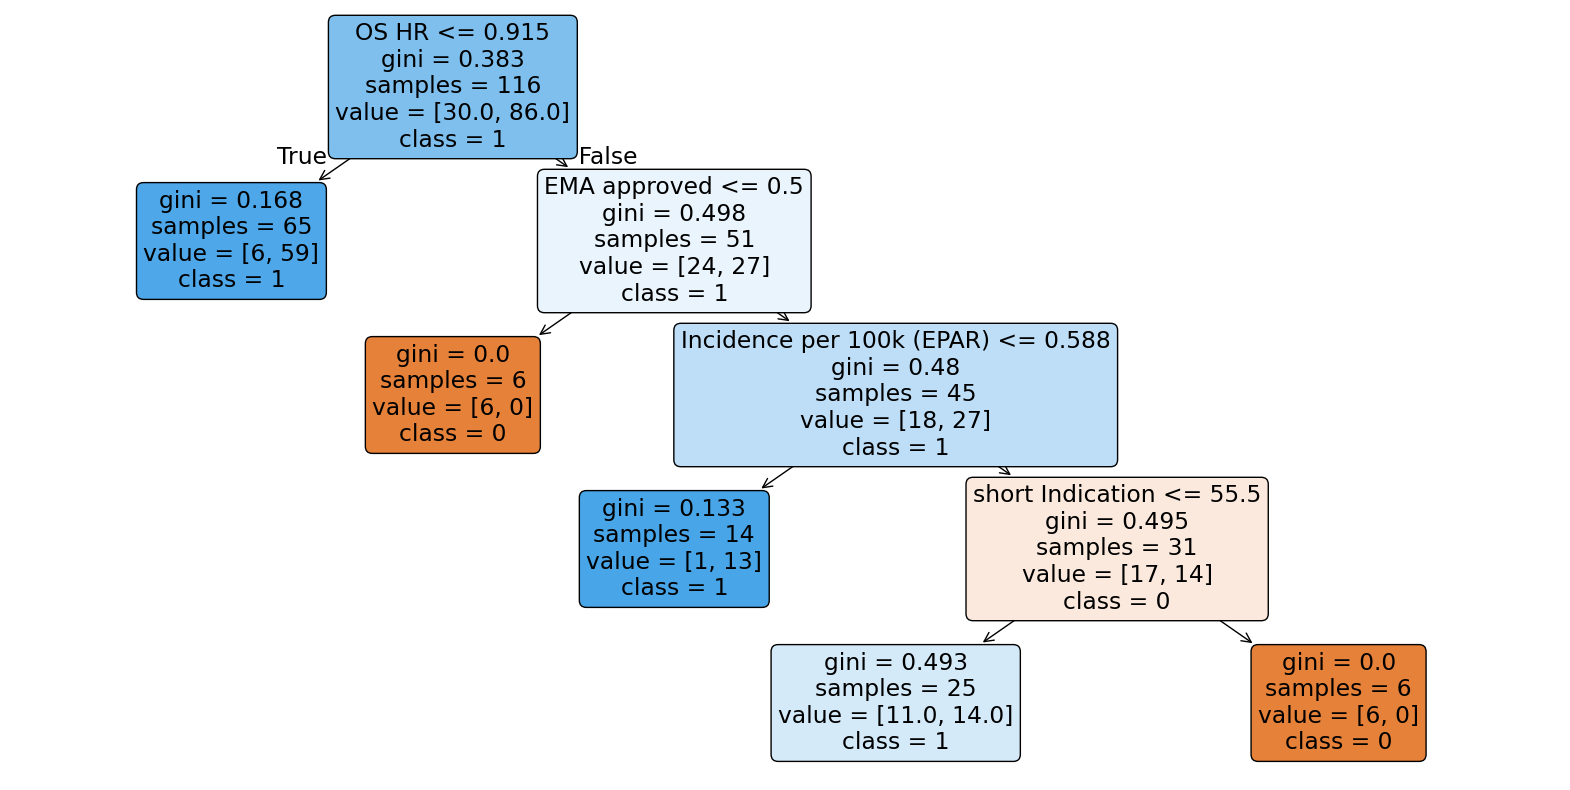

In [ ]:
# prompt: Can you help visualize the tree?

import numpy as np
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Assuming 'clf' is your trained DecisionTreeClassifier from the previous code
# and you want to visualize the tree with the best depth
best_depth = 1 # Replace with the actual best depth based on your accuracy results
clf = DecisionTreeClassifier(random_state=42, max_depth = 8, min_samples_split=10, min_impurity_decrease=0.017)  # You can add hyperparameters here (e.g., max_depth, min_samples_split)
clf.fit(x_train, y_train)

plt.figure(figsize=(20,10)) # Adjust figure size as needed
plot_tree(clf, feature_names=x.columns, class_names=np.unique(y).astype(str), filled=True, rounded=True)
plt.show()


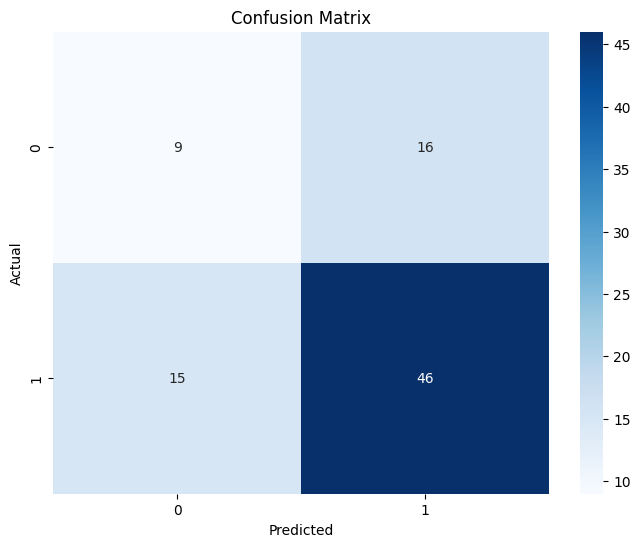

In [ ]:
# prompt: can you make a confusion matrix of this

import numpy as np
# Assuming 'clf' is your trained DecisionTreeClassifier and 'x_test', 'y_test' are your test data
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = clf.predict(x_test)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [ ]:
#3 xgboost+gridsearch

model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
param_grid = {
    'max_depth': list(range(3, 9)),
    'min_samples_split': list(range(2, 12)),
    'criterion': ['gini', 'entropy']
}

random_search = RandomizedSearchCV(
    estimator=XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    param_distributions=param_grid,
    n_iter=20,
    scoring='accuracy',
    cv=5,
    verbose=1,
    n_jobs=-1
)

random_search.fit(x_train, y_train)
best_model = random_search.best_estimator_

print("Best Params:", random_search.best_params_)
print("Best Accuracy:", accuracy_score(y_test, best_model.predict(x_test)))

Accuracy: 0.8
Fitting 5 folds for each of 20 candidates, totalling 100 fits


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:31:51] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best Params: {'min_samples_split': 11, 'max_depth': 7, 'criterion': 'entropy'}
Best Accuracy: 0.8666666666666667


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:31:59] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "criterion", "min_samples_split", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Adding Probabilities in Excel

In [ ]:
clf = DecisionTreeClassifier(random_state=42, max_depth = 6, min_samples_split=10, min_impurity_decrease=0.012)  # You can add hyperparameters here (e.g., max_depth, min_samples_split)
clf.fit(x_train, y_train)
final_data = pd.read_excel('/content/Training Data v0.1.xlsx', sheet_name='Consolidated data', header = 4).iloc[0:, 1:58]
# Filter for rows where market is either France, Italy, or Germany
final_data = final_data[final_data['Market'].isin(['France'])]
# prompt: write a code to select only the user-defined columns in the data
selected_columns = [
'Asset ',
'short Indication',
'EMA approved',
'First-in-class',
'Comparator arm',
'PFS HR',
'OS HR',
'Asset mPFS (months)',
'Asset mOS (months)',
'mPFS (months)',
'mOS (months)',
'Level of Unmet Need',
'Incidence per 100k (EPAR)',
'Orphan Drug Designation',
'Reimbursement Status'
] # Example columns, replace with your desired columns

final_data = final_data[selected_columns]


final_data = final_data[final_data['Reimbursement Status'] != 'Reimbursement decision pending']


In [ ]:
final_data[['Y_0', 'Y_1']] = clf.predict_proba(x)
# prompt: save final data in as an excel

# Assuming 'final_data' DataFrame is already created as in your provided code.

# Save the DataFrame to an Excel file
final_data.to_excel('final_data.xlsx', index=False)  # 'index=False' prevents writing row indices to the file

#Optional: Display a message to confirm the file was saved
print("Final data saved to 'final_data.xlsx'")

Final data saved to 'final_data.xlsx'


In [ ]:
x_train.to_excel('x_train1.xlsx', index=False)
